# Preparing the data for modeling

## Subsetting the dataset
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.
 
After we selected the test dataset we proceed to use the rest of the data for training the models. There are three main strategies for that:
 
* Dividing into train and dev
* Using Cross-validation
* Using Bootstrapping


## Test dataset

In [57]:
data <- read.csv("c:/Users/Mayer/Documents/DataScience/project/Noshows/NoShow_varSel.csv")

In [61]:
head(data)

,NoShow,sunday,monday,time_booked,cancel_days_1,cancel_days_2,cancel_days_3,cancel_days_4,cancel_days_5,cancel_days_6,...,quantity_6,quantity_7,amount,avg_receipt_4,avg_quantity_3,avg_quantity_5,total_cancel12,hclust4,Mclust3,Mclust4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,510,1,0,0,0,0,0,...,0,1,5.145923,0,0,0,0,1,2,3
2,0,0,0,1080,0,0,0,0,0,0,...,0,1,5.753366,0,0,0,0,2,2,3
3,0,0,0,640,0,0,0,0,0,0,...,0,0,5.572154,0,0,0,0,3,3,4
4,0,0,0,790,0,0,0,0,0,0,...,0,0,5.572154,1,1,0,0,4,2,3
5,0,0,0,720,0,0,0,0,1,0,...,0,1,4.025352,0,0,0,0,4,3,4
6,0,0,0,660,0,0,0,0,0,0,...,0,1,4.262680,0,0,0,0,3,2,3


In [59]:
summary(data)

     NoShow           sunday            monday           time_booked    
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000000   Min.   : 480.0  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000000   1st Qu.: 660.0  
 Median :0.0000   Median :0.00000   Median :0.0000000   Median : 790.0  
 Mean   :0.0783   Mean   :0.02976   Mean   :0.0004579   Mean   : 804.7  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000000   3rd Qu.: 960.0  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000000   Max.   :1170.0  
 cancel_days_1     cancel_days_2     cancel_days_3      cancel_days_4    
 Min.   :0.00000   Min.   :0.00000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.000000   Median :0.00000  
 Mean   :0.06136   Mean   :0.01648   Mean   :0.008242   Mean   :0.00641  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :

In [62]:
#table of types
TypeTab <- NULL
TypeTab <- cbind(Index=c(1:57),Type=sapply(data[,1:57],class))
TypeTab

,Index,Type
NoShow,1,integer
sunday,2,integer
monday,3,integer
time_booked,4,integer
cancel_days_1,5,integer
cancel_days_2,6,integer
cancel_days_3,7,integer
cancel_days_4,8,integer
cancel_days_5,9,integer
cancel_days_6,10,integer


In [19]:
#vfactor <- function(data=data, factorSize =10) {
 # determine which columns are integer
 # int_col <- which(sapply(data, is.integer))
 # int_col <- c(int_col,(which(sapply(data, is.numeric))))
 # mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
 # for (li in int_col) {
  #  if (length(unique(data[,li])) < factorSize) {
   #   mi <- c(mi,li)
    #  if (is.factor(data[,li]) == FALSE) {
     #   data[,li] <- as.factor(data[,li])
     # }
   # }
 # }
#}

In [63]:
toFactor <- function(data) {
    for (i in names(data)){
        if (length(unique(data[[i]]))<5){
            data[[i]] <- factor(data[[i]])
        }
    }
    return(data)
}
data2 <- toFactor(data) 
summary(data)
summary(data2)

     NoShow           sunday            monday           time_booked    
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000000   Min.   : 480.0  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000000   1st Qu.: 660.0  
 Median :0.0000   Median :0.00000   Median :0.0000000   Median : 790.0  
 Mean   :0.0783   Mean   :0.02976   Mean   :0.0004579   Mean   : 804.7  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000000   3rd Qu.: 960.0  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000000   Max.   :1170.0  
 cancel_days_1     cancel_days_2     cancel_days_3      cancel_days_4    
 Min.   :0.00000   Min.   :0.00000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.000000   Median :0.00000  
 Mean   :0.06136   Mean   :0.01648   Mean   :0.008242   Mean   :0.00641  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :

 NoShow   sunday   monday    time_booked     cancel_days_1 cancel_days_2
 0:2013   0:2119   0:2183   Min.   : 480.0   0:2050        0:2148       
 1: 171   1:  65   1:   1   1st Qu.: 660.0   1: 134        1:  36       
                            Median : 790.0                              
                            Mean   : 804.7                              
                            3rd Qu.: 960.0                              
                            Max.   :1170.0                              
 cancel_days_3 cancel_days_4 cancel_days_5 cancel_days_6 cancel_days_7
 0:2166        0:2170        0:2153        0:2143        0: 274       
 1:  18        1:  14        1:  31        1:  41        1:1910       
                                                                      
                                                                      
                                                                      
                                                               

In [64]:
library(mechkar)

In [65]:
Table1(data = data2,y = "NoShow")

Warning message in Table1(data = data2, y = "NoShow"):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "0"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "1"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |================                                                      |  23%

Warning message in stats::chisq.test(data[[v]], data[[y]]):
"Chi-squared approximation may be incorrect"


  |===============================================                       |  67%

Warning message in stats::chisq.test(data[[v]], data[[y]]):
"Chi-squared approximation may be incorrect"


  |=================================================                     |  70%

Warning message in stats::chisq.test(data[[v]], data[[y]]):
"Chi-squared approximation may be incorrect"


  |==================================================                    |  72%

Warning message in stats::chisq.test(data[[v]], data[[y]]):
"Chi-squared approximation may be incorrect"


  |====================================================                  |  74%

Warning message in stats::chisq.test(data[[v]], data[[y]]):
"Chi-squared approximation may be incorrect"


  |===================================================================== |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


V1,V2,Pop,0,1,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,2184,2013,171,NA
NoShow,1,171 (7.8%),0 (0.0%),171 (100.0%),0
sunday,1,65 (3.0%),53 (2.6%),12 (7.0%),0.003
monday,1,1 (0.0%),1 (0.0%),0 (0.0%),1
time_booked,Mean (SD),804.7 (175.8),804.2 (175.4),810.5 (180.8),NA
time_booked,Median (IQR),790.0 (660.0-960.0),790.0 (660.0-950.0),810.0 (650.0-970.0),0.653
cancel_days_1,1,134 (6.1%),0 (0.0%),134 (78.4%),0
cancel_days_2,1,36 (1.6%),0 (0.0%),36 (21.1%),0
cancel_days_3,1,18 (0.8%),18 (0.9%),0 (0.0%),0.391


## Test dataset

In [67]:
tab1 <- train_test(data = data2, train_name = "train", test_name = "test",prop = 0.6, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "1"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "2"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |===================================================================== |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"
Warning message in Ops.factor(pval, 0.05):
"'<' not meaningful for factors"
 

You got a perfectly balanced training and test datasets

 



In [69]:
dim(train)
dim(test)

[1] 1310   57

[1] 874  57

In [70]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,2184,1310,874,NA
NoShow,1,171 (7.8%),107 (8.2%),64 (7.3%),0.523
sunday,1,65 (3.0%),38 (2.9%),27 (3.1%),0.9
monday,1,1 (0.0%),1 (0.1%),0 (0.0%),1
time_booked,Mean (SD),804.7 (175.8),798.2 (176.5),814.4 (174.4),NA
time_booked,Median (IQR),790.0 (660.0-960.0),780.0 (660.0-940.0),810.0 (660.0-960.0),0.035
cancel_days_1,1,134 (6.1%),82 (6.3%),52 (5.9%),0.838
cancel_days_2,1,36 (1.6%),24 (1.8%),12 (1.4%),0.513
cancel_days_3,1,18 (0.8%),13 (1.0%),5 (0.6%),0.287


In [71]:
write.csv(test,"C:\\Users\\Mayer\\Documents\\DataScience\\project\\Noshows\\NoShowTest.csv",row.names = FALSE)

## Train and Dev

In [27]:
tab2 <- train_test(data = temp, train_name = "train", test_name = "dev",prop = 0.7, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "1"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "2"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |===================================================================== |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"
Warning message in Ops.factor(pval, 0.05):
"'<' not meaningful for factors"
 

You got a perfectly balanced training and test datasets

 



In [28]:
dim(train)
dim(dev)

[1] 916  61

[1] 394  61

In [29]:
tab2

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,1310,916,394,NA
NoShow,1,107 (8.2%),75 (8.2%),32 (8.1%),1
sunday,1,38 (2.9%),28 (3.1%),10 (2.5%),0.739
monday,1,1 (0.1%),0 (0.0%),1 (0.3%),0.301
saturday,1,259 (19.8%),180 (19.7%),79 (20.1%),0.927
time_booked,Mean (SD),805.4 (174.7),801.3 (176.0),815.2 (171.4),NA
time_booked,Median (IQR),800.0 (660.0-950.0),780.0 (660.0-940.0),810.0 (660.0-960.0),0.186
cancel_days_1,1,82 (6.3%),60 (6.6%),22 (5.6%),0.591
cancel_days_2,1,24 (1.8%),14 (1.5%),10 (2.5%),0.305


In [67]:
### save memeory, remove the datasets that will not be used more...
##rm(temp,data)

Checking the distribution of the outcome on the three subsets

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


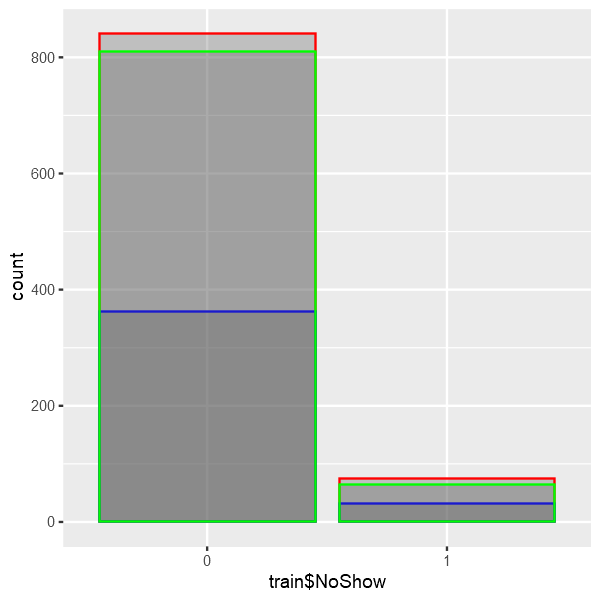

In [30]:
require(ggplot2)

options(repr.plot.width = 5, repr.plot.height = 5 )

ggplot() +
        geom_bar(aes(x=train$NoShow),color="red",alpha=0.3) +
    geom_bar(aes(x=dev$NoShow),color="blue",alpha=0.3) +
    geom_bar(aes(x=test$NoShow),color="green",alpha=0.3)


# Train-Dev

In [31]:
library(ranger)

mod1 <- ranger(NoShow ~., data=train)


In [32]:
mod1

Ranger result

Call:
 ranger(NoShow ~ ., data = train) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      916 
Number of independent variables:  60 
Mtry:                             7 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             0.22 % 

In [33]:
pred1 <- predict(mod1, data=dev)
pred1

Ranger prediction

Type:                             Classification 
Sample size:                      394 
Number of independent variables:  60 

In [34]:
table(obs=dev$NoShow, pred=pred1$predictions)

   pred
obs   0   1
  0 362   0
  1   0  32

In [36]:
library(caret)

Loading required package: lattice



In [37]:
confusionMatrix(pred1$predictions, dev$NoShow)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 362   0
         1   0  32
                                     
               Accuracy : 1          
                 95% CI : (0.9907, 1)
    No Information Rate : 0.9188     
    P-Value [Acc > NIR] : 3.204e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.9188     
         Detection Rate : 0.9188     
   Detection Prevalence : 0.9188     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

# Cross-Validation

<img src="https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif"/>


In [38]:
if(!require(DMwR)) {install.packages("DMwR");require(DMwR)}
library(dplyr)

Loading required package: DMwR

Warning message:
"package 'DMwR' was built under R version 3.6.3"
Loading required package: grid

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [45]:
set.seed(1065)
seeds <- vector(mode = "list", length = 51)
for(i in 1:50) seeds[[i]] <- sample.int(1000, 22)

## For the last model:
seeds[[51]] <- sample.int(1000, 1)

In [46]:
# droping variables with less then 1  level
l <- sapply(data2, function(x) is.factor(x))
m <- data2[, l]
n <- ifelse( sapply(m, function(x) length(levels(x))) == 1, "DROP", "NODROP")
n<-as.data.frame(n)
dv <- n %>% tibble::rownames_to_column() %>% filter (n=='DROP')
(dv <- dv$rowname)

[1] "service_EXT"       "service_FF"        "service_NECK"     
[4] "service_SSUD"      "Canceled_By_HOUSE"

In [47]:
vn <- setdiff(names(temp),dv)
temp2 <- temp[,vn]
head(temp2)

,NoShow,sunday,monday,saturday,time_booked,cancel_days_1,cancel_days_2,cancel_days_3,cancel_days_4,cancel_days_5,...,quantity_3,quantity_5,quantity_6,quantity_7,amount,avg_receipt_4,avg_quantity_5,total_cancel12,hclust4,Mclust4
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>
526,0,0,0,0,550,0,0,0,0,0,...,0,0,0,0,4.110874,0,0,1.791759,4,4
195,0,0,0,0,760,0,0,0,0,0,...,0,0,0,0,4.418841,0,0,0.000000,1,3
1842,0,0,0,1,600,0,0,0,0,0,...,0,0,0,1,5.572154,0,0,1.098612,1,4
1142,0,0,0,0,540,0,0,0,0,0,...,0,0,0,1,4.025352,0,0,0.000000,4,4
1253,0,0,0,0,1020,0,0,0,0,0,...,0,0,0,0,3.433987,0,0,0.000000,2,2
1268,0,0,0,1,530,0,0,0,0,0,...,1,0,0,0,4.394449,0,0,0.000000,4,4


In [48]:
# define training control
train_control <- trainControl(method = "repeatedcv", repeats = 5, seeds=seeds, sampling='smote')
# train the model
model <- train(NoShow~., data=temp2, trControl=train_control, method="ranger")

In [49]:
# summarize results
print(model)

Random Forest 

1310 samples
  55 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1179, 1179, 1178, 1179, 1179, 1179, ... 
Addtional sampling using SMOTE

Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   2    gini        0.9818269  0.8743342
   2    extratrees  0.9839655  0.8986177
  30    gini        0.9992378  0.9947253
  30    extratrees  0.9987809  0.9918702
  59    gini        0.9987774  0.9917875
  59    extratrees  0.9984721  0.9900915

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 30, splitrule = gini
 and min.node.size = 1.


# Dataset Inbalance

In [50]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance

Warning message:
"package 'imbalance' was built under R version 3.6.3"
Loading required package: ROSE

Loaded ROSE 0.0-3




In [51]:
table(temp2$NoShow)
table(temp2$NoShow)/nrow(temp2)*100


   0    1 
1203  107 


        0         1 
91.832061  8.167939 

In [52]:
numZero <- length(which(temp2$NoShow == 0))
numOne <- length(which(temp2$NoShow == 1))
nInstances <- numZero - numOne
cbind(numZero=numZero,numOne=numOne,nInstances=nInstances)

numZero,numOne,nInstances
1203,107,1096


## Under Sampling
 
This techniques uses all the rows containing the minority class and select randomly the same number of minority class for the rows with the mayority class 

In [53]:
data_balanced_under <- ovun.sample(NoShow ~ ., data = temp2, method = "under",N = numOne*2)$data
table(data_balanced_under$NoShow)


  0   1 
107 107 

## Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the mayority class. The repeated rows are selected randomly.

In [54]:
#over sampling
data_balanced_over <- ovun.sample(NoShow ~ ., data = temp2, method = "over",N = numZero*2)$data
table(data_balanced_over$NoShow)


   0    1 
1203 1203 

## Over-Under Sampling
 
In this technique we randomly select half of the majority class rows (under sampling) and increment the minority class rows by selecting them randomly.   

In [55]:
#over_under sampling
data_balanced_both <- ovun.sample(NoShow ~ ., data = temp2, method = "both", p=0.5,N = 1203, seed = 1)$data
table(data_balanced_both$NoShow)


  0   1 
629 574 

## ROSE (Random Over-Sampling Examples) 
 
Creates a sample of synthetic data by enlarging the features space of minority and majority class examples. ROSE selects an observation belonging to the class k and generates new examples in its neighbourhood

In [56]:
# Rose: 
data.rose <- ROSE(NoShow ~ ., data = temp2, seed = 1)$data
table(data.rose$NoShow)


  0   1 
685 625 

## Models

In [242]:
mod1 <- ranger(NoShow ~., data=temp2)
pred1 <-predict(mod1, data=temp2,type='response')
table(pred=pred1$predictions, obs =temp2$NoShow)

    obs
pred    0    1
   0 1203    0
   1    0  107

In [244]:
mod2 <- ranger(NoShow ~., data=data_balanced_under)
pred2 <- predict(mod2, data=data_balanced_under,type='response')
table(pred=pred2$predictions, obs =data_balanced_under$NoShow)
table(pred=pred1$predictions, obs =temp2$NoShow)

    obs
pred   0   1
   0 107   0
   1   0 107

    obs
pred    0    1
   0 1203    0
   1    0  107

In [245]:
mod3 <- ranger(NoShow ~., data=data_balanced_over)
pred3 <- predict(mod3, data=data_balanced_over,type='response')
table(pred=pred3$predictions, obs =data_balanced_over$NoShow)
table(pred=pred1$predictions, obs =temp2$NoShow)

    obs
pred    0    1
   0 1203    0
   1    0 1203

    obs
pred    0    1
   0 1203    0
   1    0  107

In [246]:
mod4 <- ranger(NoShow ~., data=data_balanced_both)
pred4 <- predict(mod4, data=data_balanced_both,type='response')
table(pred=pred4$predictions, obs =data_balanced_both$NoShow)
table(pred=pred1$predictions, obs =temp2$NoShow)

    obs
pred   0   1
   0 629   0
   1   0 574

    obs
pred    0    1
   0 1203    0
   1    0  107

In [251]:
mod5 <- ranger(NoShow ~., data=data.rose)
pred5 <- predict(mod5, data=data.rose,type='response')
table(pred=pred5$predictions, obs =data.rose$NoShow)
table(pred=pred1$predictions, obs =temp2$NoShow)


    obs
pred   0   1
   0 685   0
   1   0 625

    obs
pred    0    1
   0 1203    0
   1    0  107